<a href="https://colab.research.google.com/github/Aashi-sharma/Stock-Trend-Prediction-LSTM-model-/blob/main/Stock_Trend_Prediction_(LSTM_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
!pip install yfinance
import yfinance as yf

In [ ]:
start = '2015-01-01'
end = '2023-12-31'

ticker_symbol = 'AAPL'
df = yf.download(ticker_symbol, start=start, end=end)
df = df.reset_index()
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


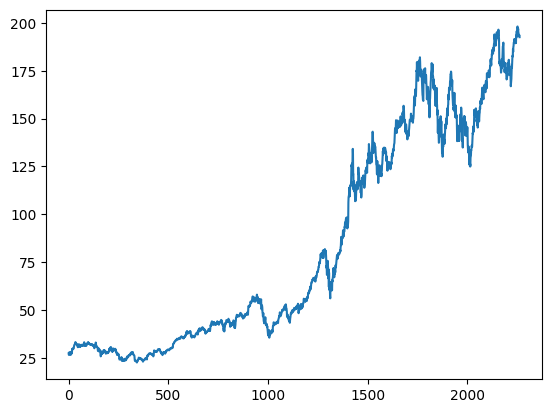

In [ ]:
plt.plot(df.Close)

Moving Average (100 days)

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2259    181.768301
2260    181.787101
2261    181.898701
2262    182.046001
2263    182.173301
Name: Close, Length: 2264, dtype: float64

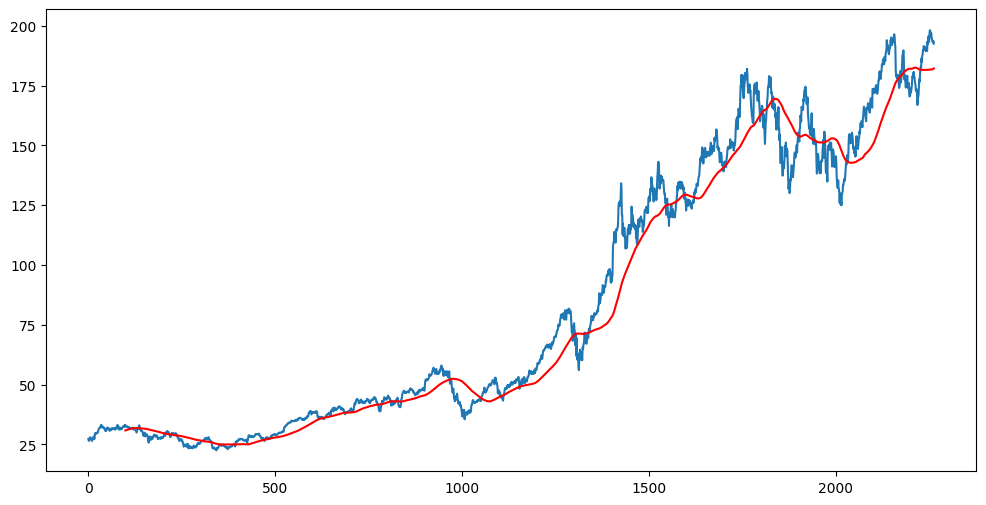

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

Moving Average (200 days)

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2259    178.649100
2260    178.871851
2261    179.085250
2262    179.290201
2263    179.487900
Name: Close, Length: 2264, dtype: float64

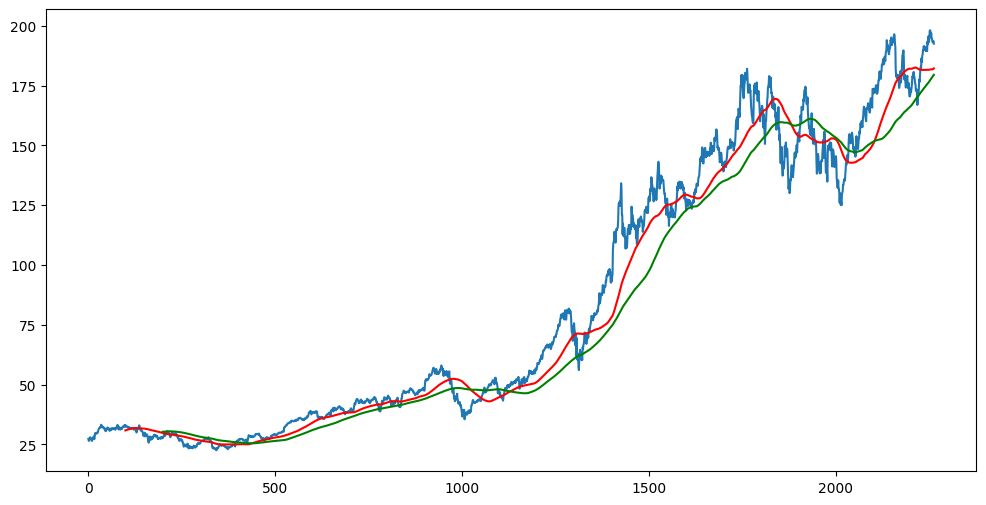

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape

(2264, 5)

Splitting data into training and testing

In [ ]:
# Splitting dataset into 70% and 30% for training and testing respectively

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1584, 1)
(680, 1)


In [ ]:
data_training.head()

,Close
0,27.332500
1,26.562500
2,26.565001
3,26.937500
4,27.972500


In [ ]:
data_testing.head()

,Close
1584,133.110001
1585,133.500000
1586,131.940002
1587,134.320007
1588,134.720001


Scaling down training data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03937384],
       [0.03298777],
       [0.03300851],
       ...,
       [0.92817746],
       [0.92535766],
       [0.93099725]])

In [ ]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train),np.array(y_train)

ML model

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences= True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

# Second Layer
model.add(LSTM(units = 60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

# Third Layer
model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

# Fourth Layer
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

# Last Layer
model.add(Dense(units = 1))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train , epochs = 50)

Epoch 1/50
47/47 [==============================] - 20s 293ms/step - loss: 0.0303
Epoch 2/50
47/47 [==============================] - 14s 294ms/step - loss: 0.0071
Epoch 3/50
47/47 [==============================] - 14s 294ms/step - loss: 0.0047
Epoch 4/50
47/47 [==============================] - 14s 293ms/step - loss: 0.0047
Epoch 5/50
47/47 [==============================] - 14s 304ms/step - loss: 0.0050
Epoch 6/50
47/47 [==============================] - 17s 353ms/step - loss: 0.0048
Epoch 7/50
47/47 [==============================] - 15s 316ms/step - loss: 0.0043
Epoch 8/50
47/47 [==============================] - 14s 295ms/step - loss: 0.0042
Epoch 9/50
47/47 [==============================] - 14s 293ms/step - loss: 0.0038
Epoch 10/50
47/47 [==============================] - 14s 296ms/step - loss: 0.0040
Epoch 11/50
47/47 [==============================] - 14s 293ms/step - loss: 0.0036
Epoch 12/50
47/47 [==============================] - 14s 295ms/step - loss: 0.0036
Epoch 13/50
4

In [ ]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index = True)

<ipython-input-48-1e7e7f089a7f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [ ]:
final_df.head()

,Close
0,113.849998
1,115.169998
2,116.029999
3,116.589996
4,119.050003


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.01566579],
       [0.0258723 ],
       [0.03251837],
       [0.0617138 ],
       [0.10526943],
       [0.10954193],
       [0.10788041],
       [0.09969145],
       [0.11749349],
       [0.12497031],
       [0.09411346],
       [0.11144077],
       [0.10159037],
       [0.09411346],
       [0.16650841],
       [0.16567765],
       [0.17624019],
       [0.15202949],
       [0.1706622 ],
       [0.21398061],
       [0.20306204],
       [0.21504869],
       [0.27106579],
       [0.24946589],
       [0.23581773],
       [0.22359368],
       [0.18466657],
       [0.2036553 ],
       [0.15131735],
       [0.20258722],
       [0.21599815],
       [0.17956322],
       [0.17742706],
       [0.20223119],
       [0.17873255],
       [0.15772609],
       [0.16591506],
       [0.21576074],
       [0.27320195],
       [0.29931175],
       [0.34500355],
       [0.34785194],
       [0.33479704],
       [0.27581293],
       [0.21493007],
       [0.24080228],
       [0.250

In [ ]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

x_test , y_test = np.array(x_test), np.array(y_test)


Making predictions

In [ ]:
y_predicted = model.predict(x_test)

22/22 [==============================] - 2s 82ms/step


In [ ]:
y_test

array([0.22857823, 0.23320675, 0.21469266, 0.24293862, 0.24768576,
       0.24376929, 0.23415622, 0.23296934, 0.20899606, 0.22181337,
       0.16615238, 0.16911948, 0.18858304, 0.19416102, 0.15428435,
       0.14312847, 0.10586278, 0.1319725 , 0.16140515, 0.14740088,
       0.1305483 , 0.12864946, 0.15974364, 0.13743178, 0.15725136,
       0.15487779, 0.15428435, 0.13565155, 0.1277    , 0.12378353,
       0.13304057, 0.11500121, 0.14289106, 0.14300976, 0.15297886,
       0.15760739, 0.14550204, 0.16021837, 0.19736526, 0.18739616,
       0.19344879, 0.21291235, 0.19712803, 0.21896516, 0.23890336,
       0.23558032, 0.23213867, 0.22857823, 0.24839781, 0.26679329,
       0.27427021, 0.27794927, 0.30987429, 0.3343224 , 0.3645859 ,
       0.3488014 , 0.37099456, 0.36375505, 0.3772846 , 0.41894131,
       0.41098975, 0.38618562, 0.33942556, 0.38333723, 0.3744362 ,
       0.39105155, 0.41193921, 0.41704256, 0.39069553, 0.36945166,
       0.3772846 , 0.37989558, 0.37586049, 0.39769762, 0.39283

In [ ]:
y_predicted

array([[0.14485553],
       [0.15284982],
       [0.16242503],
       [0.1730455 ],
       [0.18369673],
       [0.19384202],
       [0.20331022],
       [0.21185786],
       [0.21927577],
       [0.22530313],
       [0.22985147],
       [0.23254141],
       [0.23317009],
       [0.23187453],
       [0.22916183],
       [0.22525209],
       [0.22021282],
       [0.21403956],
       [0.20699751],
       [0.19959074],
       [0.19231915],
       [0.18578614],
       [0.18013118],
       [0.17547578],
       [0.17160423],
       [0.1682312 ],
       [0.16523452],
       [0.16263819],
       [0.16050269],
       [0.15882674],
       [0.1575399 ],
       [0.15657297],
       [0.15584072],
       [0.15528643],
       [0.15487224],
       [0.15460493],
       [0.1545223 ],
       [0.15463366],
       [0.15496375],
       [0.1556075 ],
       [0.15663446],
       [0.15808886],
       [0.16002615],
       [0.16261722],
       [0.16617066],
       [0.17079633],
       [0.1764373 ],
       [0.183

In [ ]:
# Value of Scale Factor
scaler.scale_

array([0.01186803])

In [ ]:
scale_factor = 1/0.01186803
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

Plotting the final graph

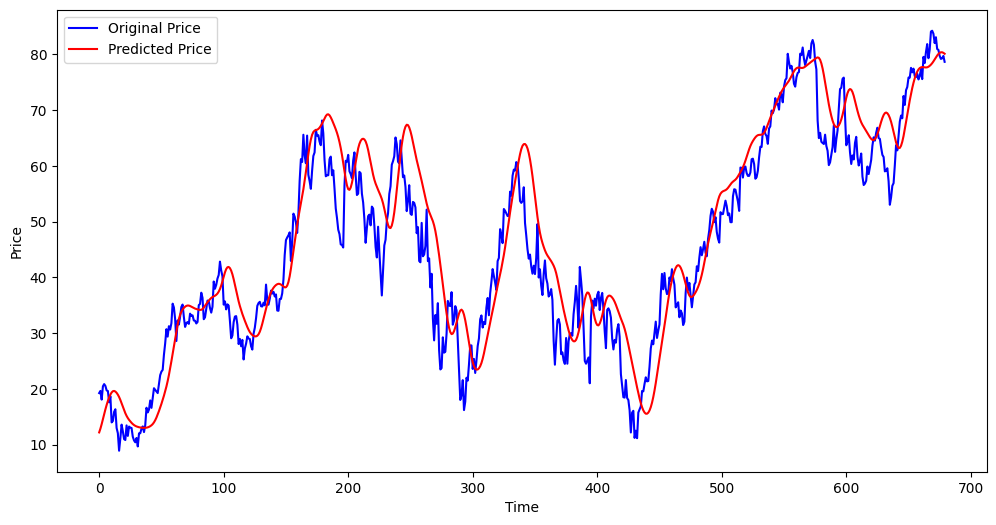

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()